# Probability Theory Review

### Preliminaries

- Goal 
  - Review of probability theory from a logical viewpoint (i.e., a Bayesian interpretation)
- Materials        
  - Mandatory
    - These lecture notes
  - Optional
    - Bishop pp. 12-20       
    - [Bruininkx - 2002 - Bayesian Probability](./files/Bruyninkx-2002-Bayesian-probability.pdf)


### Why Probability Theory?

- Probability theory (PT) is the **theory of optimal processing of incomplete information**, and as such provides a quantitative framework for drawing conclusions from a finite (read: incomplete) data set.
- Machine learning concerns drawing conclusions from data.
- In general, nearly all interesting questions in machine learning can be stated in the following form (a conditional probability):

$$p(\text{whatever-we-want-to-know}\, | \,\text{whatever-we-do-know})$$

- For example
  - Generate data predictions, $p(x_{\text{future}}|x_{\text{past}})$
  - Classify a received data point, $p(\mathcal{C}_k|x)$
  - Compress data in an efficient way from $p(x_n|x_{1:n-1})$

- Note that **Information theory** (the "theory of log-probability") provides a source coding view on machine learning that is consistent with probability theory (more in part-2). 


### Probability Theory Notation
-  An **event** $A$ is a statement, whose truth is contemplated by a person, e.g.,

$$A = \text{`it will rain tomorrow'}$$
 
- Notation: $\bar{A}$ (latex: \bar{A}) is **not**-A, the denial of statement $A$
- For any event $A$, with background knowledge $I$, the **probability of $A$, given $I$** is written as 
$$p(A|I)$$
which is a number between $0$ and $1$. If, given $I$, you know that $A$ is true, than $p(A|I)=1$.

- The probability $p(A|I)$ should be **interpreted as your degree of belief** that event $A$ is true, given that $I$ is true. This is an extremely powerful interpretation (later more about this). 

Notation for compound events:

- $p(A,B|I)$ is the **joint** probability that both $A$ and $B$ are true, given $I$.
- $p(A+B|I)$ is the probability that either $A$ or $B$, or both $A$ and $B$, are true, given $I$.




### Probability Theory Calculus
 
Probability theory **extends** boolean logic to rational reasoning with uncertainty. Under some mild conditions, the following calculation rules can be derived, (see [Cox, 1946](https://en.wikipedia.org/wiki/Cox%27s_theorem)):
 
- **Product rule**. For 2 events $A, B$ with given background $I$,

$$ p(A,B|I) = p(A|B,I)\,p(B|I) \,.$$

- **Sum rule**. For 2 events $A$, $B$ with given background $I$,

$$ p(A+B|I) = p(A|I) + p(B|I) - p(A,B|I)\,.$$

- Clearly, it follows from the sum rule that $ p(A|I) + p(\bar{A}|I) = 1$

- Note that the background information may not change, e.g., if $I^\prime \neq I$, then 

$$p(A,B|I) \neq p(A|B,I)\,p(B|I^\prime)$$ 

- **All legitimate relations between probabilities can be derived from the sum and product rules!!**


### Some Notation and useful facts

- Iff 
$$p(A,B|I) = p(A|I)p(B|I)$$
then $A$ and $B$ are said to be **independent**, given $I$. Note that this is equivalent to the statement $p(A|B,I)=p(A|I)$.

- The product and sum rules are also known as the **axioms of probability theory**, but in fact they can be derived as the unique rules for rational reasoning under uncertainty.
- All probabilities are in principle conditional probabilities of the type $p(A|I)$, since there is always some background knowledge. 
 
- Shorthand notation
  - Still, we often write $p(A)$ rather than $p(A|I)$ if the background knowledge $I$ is assumed to be obviously present. E.g., $p(X=5)$ rather than $p(X=5|\text{the sun comes up tomorrow})$.    
  - If $X$ is a random variable and $X=x$ is an event, then we often write $p(x)$ rather than $p(X=x)$ (hoping again that the reader understands the context ;-)  
  - $p(X)$ denotes the distribution over random variable $X$.   

- Next, we present two useful corollaries:  (1) Marginalization and (2) Bayes rule 



### The Sum Rule and Marginalization
- If $X$ and $Y$ are random variables, than it follows from the sum rule that 

$$p(X) = \sum_Y p(X,Y) \left( = \sum_Y p(X|Y)p(Y) \right)$$ 

- Note that Bishop (p.14) calls this the sum rule.

- Proof this!

- Of course, in the continuous domain, $p(x)=\int p(x,y) \mathrm{d}y$

- Integrating $Y$ out of a joint distribution is called **marginalization** and the result $p(X)$ is sometimes referred to as the **marginal probability**. 


### The Product Rule and Bayes Rule

- Consider 2 variables $D$ and $\theta$; it follows from $p(D,\theta)=p(D|\theta)p(\theta)=p(\theta|D)p(D)$ that

$$ p(\theta|D) = \frac{p(D|\theta) p(\theta)}{p(D)}$$ 

- This formula is called **Bayes rule**. While Bayes rule is always true, a particularly useful application occurs when $D$ refers to an observed data set and $\theta$ is set of model parameters that relates to the data. In that case,

  - the **prior** probability $p(\theta)$ represents our **degree-of-belief** about proper values for $\theta$, before seeing the data $D$.
  - the **posterior** probability $p(\theta|D)$ relates to our state-of-knowledge about $\theta$ after we have seen the data.

$\Rightarrow$ Bayes rule tells us how to update our knowledge about model parameters (or other hypotheses) when facing new data. Hence, 

<center>
<div style="border:2px solid blue;padding:1em;">
**Bayes rule is the fundamental rule for machine learning!**
</div>
</center>



### Bayes Rule Nomenclature
- Some nomenclature associated with Bayes rule
$$\begin{equation}
\underbrace{p(\theta | D)}_{\text{posterior}} = \frac{\overbrace{p(D|\theta)}^{\text{likelihood}} \times \overbrace{p(\theta)}^{\text{prior}}}{\underbrace{p(D)}_{\text{evidence}}}
\end{equation}$$

- Note that the evidence can be computed through marginalization since
$$ p(D) = \int p(D,\theta) \,\mathrm{d}\theta = \int p(D|\theta)\,p(\theta) \,\mathrm{d}\theta$$

- For given $D$, the posterior probabilities of the parameters scale relatively against each other as
$$
p(\theta|D) \propto p(D|\theta) p(\theta)
$$

$\Longrightarrow$ All that we can learn from the observed data is contained in the likelihood function $p(D|\theta)$. This is called the **likelihood principle**.


### The Likelihood Function

Consider a probabilistic model $p(D|\theta)$, where $D$ relates to a data set and $\theta$ are model parameters.

- In general, $p(D|\theta)$ is a function of both $D$ and $\theta$.

- The **sampling distribution** $$p(D|\theta=\theta_0)$$ describes the probability that data $D$ is observed, assuming that it is generated by the given model with parameter values set to $\theta = \theta_0$.

- In a machine learning context, often $D=D_0$ is given (observed), and $\theta$ is the free variable.

- When viewed as a function of the free variable $\theta$ with given $D=D_0$, $$\mathrm{L}(\theta) \triangleq p(D=D_0|\theta)$$ is called the **likelihood function** (for $\theta$)

- Note that $\mathrm{L}(\theta)$ is not a probability distribution for $\theta$.  (Is $\sum_\theta \mathrm{L}(\theta)=1$ always true?)



#### CODE EXAMPLE

Consider the following simple model for the outcome of the tossing of a biased coin with parameter $\theta \in [0,1]$:

$
y \in \{0,1\}, \\
p(y|\theta) \triangleq y\cdot\theta + (1-y)\cdot(1-\theta),\\
p(D|\theta) = p(y_1,\ldots,y_N|\theta) = \Pi_{n=1}^N p(y_n|\theta).
$

If we consider just one data point, we can plot both the sampling distribution (i.e. $p(y|\theta=0.8)$) and the likelihood function (i.e. $L(\theta) = p(y=0|\theta)$).

Checkbox([Input{Bool}] false,"y",false)

Slider{Float64}([Input{Float64}] 0.5,"θ",0.5,0.0:0.1:1.0)

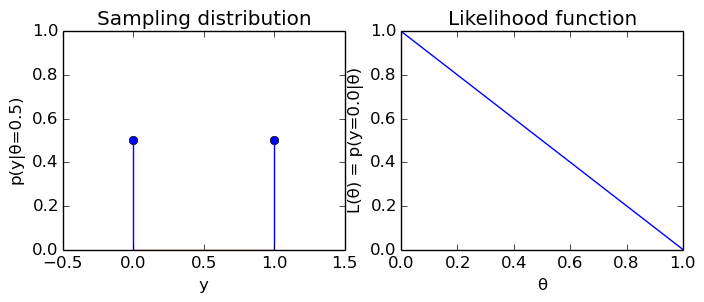

In [4]:
using Reactive, Interact, PyPlot
p(y,θ) = y.*θ + (1-y).*(1-θ)
f = figure()
@manipulate for y=false, θ=0:0.1:1; withfig(f) do
        # Plot the sampling distribution
        subplot(221); stem([0,1], p([0,1],θ)); title("Sampling distribution"); xlim([-0.5,1.5]); ylim([0,1]); xlabel("y"); ylabel("p(y|θ=$(θ))");
        # Plot the likelihood function
        _θ = linspace(0.0, 1.0, 100)
        subplot(222); plot(_θ, p(convert(Float64,y), _θ)); title("Likelihood function"); xlabel("θ"); ylabel("L(θ) = p(y=$(convert(Float64,y))|θ)");
    end
end

The (discrete) sampling distribution is a valid probability distribution. 
However, the likelihood function $L(\theta)$ clearly isn't, since $\int_0^1 L(\theta) \mathrm{d}\theta \neq 1$. 

#### END OF CODE EXAMPLE


### Probabilistic Inference
-- **Probabilistic inference** is computing

$$
p(\text{whatever-we-want-to-know}\, | \,\text{whatever-we-do-know})
$$

E.g., 

   $p(\,\text{Mr.S. killed Mrs.S.} \;|\; \text{evidence}\,),$

   $p(\,\text{transmitted codeword} \;|\;\text{received codeword}\,),$

   $p(\,\text{articulatory movements} \;|\; \text{speech signal}\,),$

   $p(\,\text{fetal HR signal} \;|\;\text{mother signal}\,).$
                
- This can be accomplished by repeated application of sum and product rules, (of course).

- In practice, Bayes Rule and  marginalization are very useful tools.

- The resulting expressions often contain a bunch of (hard) integrals and/or sums (with many terms).


### Inference Exercise: Disease Diagnosis

[Q.] Given a disease $D$ with prevalence of $1\%$ and a test procedure $T$ with sensitivity ('true positive' rate) of $95\%$ and specificity ('true negative' rate) of $85\%$, what is the chance that somebody who tests positive actually has the disease?

[A.] The given data are $p(D=1)=0.01$, $p(T=1|D=1)=0.95$ and $p(T=0|D=0)=0.85$. Then according to Bayes rule,

$$\begin{align*}
p( & D=1 | T=1) \\
&= \frac{p(T=1|D=1)p(D=1)}{p(T=1)} \tag{Bayes}\\
&= \frac{p(T=1|D=1)p(D=1)}{p(T=1|D=1)p(D=1)+p(T=1|D=0)p(D=0)} \tag{marg.}\\
&= \frac{0.95\times0.01}{0.95\times0.01 + 0.15\times0.99} = 0.0601
\end{align*}$$


### Inference Exercise: Bag Counter
[Q.] A bag contains one ball, known to be either white or black. A white ball is put in, the bag is shaken,
 and a ball is drawn out, which proves to be white. What is now the
 chance of drawing a white ball?

[A.]  Again, use Bayes and marginalization to arrive at $p(\text{white}|\text{data})=2/3$, see homework exercise

$\Rightarrow$ Note that probabilities describe **a person's state of knowledge** rather than a 'property of nature'.

[Q.] Is a speech signal a 'probabilistic' (random) variable? (homework)





### Inference Exercise: Causality?

[Q.] A dark bag contains five red balls and seven green ones. (a) What is the probability of drawing a red ball on the first draw? Balls are not returned to the bag after each draw. (b) If you know that on the second draw the ball was a green one, what is now the probability of drawing a red ball on the first draw?

[A.] (a) $5/12$. (b) $5/11$, see homework.

$\Rightarrow$ Again, we conclude that conditional probabilities reflect **implications for a state of knowledge** rather than temporal causality.



### PDF for the Sum of Two Variables

[Q.]: Given two random **independent** variables
$X$ and $Y$, with PDF's $p_x(x)$ and $p_y(y)$. What is the PDF
of $Z = X + Y$?

[A.]: Let $p_z(z)$ be the probability that $Z$ has value $z$. This occurs if $X$ has some value $x$ and at the same time $Y=z-x$, with joint probability $p_x(x)p_y(z-x)$. Since $x$ can be any value, we sum over all possible values for $x$ to get

$$
        p_z (z) = \int_{ - \infty }^\infty  {p_x (x)p_y (z - x)\,\mathrm{d}{x}}
$$
        
i.e., the **convolution** of $p_x$ and $p_y$.
        
Note that $p_z(z) \neq p_x(x) + p_y(y)\,$ !!

$\Rightarrow$ In linear stochastic systems theory, the Fourier Transform of a PDF (i.e., the characteristic function) plays an important computational role.


#### CODE EXAMPLE

Consider the PDF of the sum of two independent Gaussians $X$ and $Y$:

$
p_X(x) = \mathcal{N}(x|\mu_X,\sigma_X^2), \\ 
p_Y(y) = \mathcal{N}(y|\mu_Y,\sigma_Y^2), \\
Z = X + Y.
$

Performing the convolution (nice exercise) yields a Gaussian PDF for $Z$: 

$
p_Z(z) = \mathcal{N}(z|\mu_X+\mu_Y,\sqrt{\sigma_X^2+\sigma_Y^2}).
$

Slider{Float64}([Input{Float64}] 0.0,"μx",0.0,-2.0:0.1:2.0)

Slider{Float64}([Input{Float64}] 1.0,"σx",1.0,0.1:0.1:1.9)

Slider{Float64}([Input{Float64}] 2.0,"μy",2.0,0.0:0.1:4.0)

Slider{Float64}([Input{Float64}] 0.5,"σy",0.5,0.1:0.1:0.9)

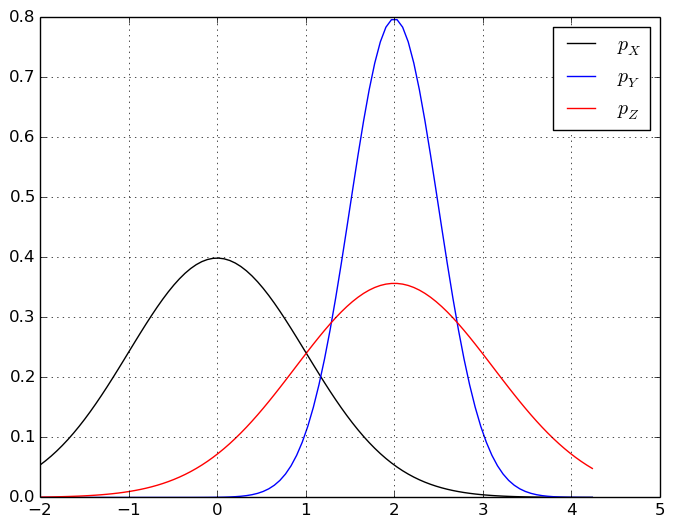

In [22]:
using Reactive, Interact, PyPlot, Distributions
f = figure()
@manipulate for μx=-2:0.1:2, σx=0.1:0.1:1.9,μy=0:0.1:4, σy=0.1:0.1:0.9; withfig(f) do
        μz = μx+μy; σz = sqrt(σx^2 + σy^2)
        x = Normal(μx, σx)
        y = Normal(μy, σy)
        z = Normal(μz, σz)
        range_min = minimum([μx-2*σx, μy-2*σy, μz-2*σz])
        range_max = maximum([μx+2*σx, μy+2*σy, μz+2*σz])
        range = linspace(range_min, range_max, 100)
        plot(range, pdf(x,range), "k-")
        plot(range, pdf(y,range), "b-")
        plot(range, pdf(z,range), "r-")
        legend([L"p_X", L"p_Y", L"p_Z"])
        grid()
    end
end

#### END OF CODE EXAMPLE


### Expectation and Variance

- $\mathrm{E}[f] \equiv  \int f(x) \,p(x) \,\mathrm{d}{x}$, **expected value** or **mean**

- $\mathrm{var}[f] \equiv \mathrm{E} \left[(f(x)-\mathrm{E}[f(x)])^2 \right]$, **variance**

- The **covariance** between _vectors_ $x$ and $y$,

\begin{align*}
    \mathrm{cov}[x,y] &= \mathrm{E}\left[ (x-\mathrm{E}[x]) (y^T-\mathrm{E}[y^T]) \right]\\
    &= \mathrm{E}[x y^T] - \mathrm{E}[x]\mathrm{E}[y^T]
\end{align*}

-  Also useful as: $\mathrm{E}[xy^T] = \mathrm{cov}[x,y] + \mathrm{E}[x]\mathrm{E}[y^T]$


### Linear Transformations

No matter how $x$ is distributed, we can easily derive that **(do as exercise)**

\begin{align}
\mathrm{E}[Ax +b] &= A\mathrm{E}[x] + b \tag{SRG-3a}\\
\mathrm{cov}[Ax +b] &= A\,\mathrm{cov}[x]\,A^T \tag{SRG-3b}
\end{align}

-  (The tag (SRG-3a) refers to the corresponding eqn number in Sam Roweis' Gaussian Identities notes.)




### Example: Mean and Variance for the Sum of Two Variables

For any distribution of $x$ and $y$ and $z=x+y$,

\begin{align*}
    \mathrm{E}[z] &= \int_z z \left[\int_x p_x(x)p_y(z-x) \,\mathrm{d}{x} \right] \,\mathrm{d}{z} \\
&= \int_x p_x(x) \left[ \int_z z p_y(z-x)\,\mathrm{d}{z} \right] \,\mathrm{d}{x}  \\
    &= \int_x p_x(x) \left[ \int_{y^\prime} (y^\prime +x)p_y(y^\prime)\,\mathrm{d}{y^\prime} \right] \,\mathrm{d}{x} \notag\\
&= \int_x p_x(x) \left( \mathrm{E}[y]+x \right) \,\mathrm{d}{x} \notag\\
    &= \mathrm{E}[x] + \mathrm{E}[y] \qquad \text{(always; follows from SRG-3a)}
\end{align*}


Derive as an exercise that

\begin{align*}
\mathrm{var}[z] &= \mathrm{var}[x] + \mathrm{var}[y] + 2\mathrm{cov}[x,y] \qquad \text{(always, see SRG-3b)} \notag\\
    &= \mathrm{var}[x] + \mathrm{var}[y] \qquad \text{(if X and Y are independent)}
\end{align*}



### Review Probability Theory

- Interpretation as a degree of belief, i.e. a state-of-knowledge, not as a property of nature.
- We can do everything with only the **sum rule** and the **product rule**. In practice, **Bayes rule** and **marginalization** are often very useful for computing

$$p(\text{what-we-want}|\,\text{what-we-know})\,.$$

- Bayes rule $ p(\theta|D) = \frac{p(D|\theta)p(\theta)} {p(D)} $ is the fundamental rule for learning!

- That's really about all you need to know about probability theory, but you need to _really_ know it, so do the exercises.


In [5]:
open("../../styles/aipstyle.css") do f
    display("text/html", readall(f))
end